In [26]:
import pandas as pd
# Step 1: Load data
df = pd.read_csv('ESG Project Data.csv')

In [57]:
# Step 2: Preview data
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11000 entries, ('Retail', np.int64(2015)) to ('Consumer Goods', np.int64(2025))
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Revenue            11000 non-null  float64
 1   ProfitMargin       11000 non-null  float64
 2   MarketCap          11000 non-null  float64
 3   GrowthRate         11000 non-null  float64
 4   ESG_Overall        11000 non-null  float64
 5   ESG_Environmental  11000 non-null  float64
 6   ESG_Social         11000 non-null  float64
 7   ESG_Governance     11000 non-null  float64
dtypes: float64(8)
memory usage: 709.8+ KB


In [58]:
df.head()

Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall  \
Industry Year                                                              
Retail   2015    459.2           6.0      337.5         4.9         57.0   
         2016    473.8           4.6      366.6         3.2         56.7   
         2017    564.9           5.2      313.4        19.2         56.5   
         2018    558.4           4.3      283.0        -1.1         58.0   
         2019    554.5           4.9      538.1        -0.7         56.6   

               ESG_Environmental  ESG_Social  ESG_Governance  
Industry Year                                                 
Retail   2015               60.7        33.5            76.8  
         2016               58.9        32.8            78.5  
         2017               57.6        34.0            77.8  
         2018               62.3        33.4            78.3  
         2019               63.7        30.0            76.1

In [28]:
# Step 3: Check for missing values
print(df.isnull().sum())

Industry                0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
dtype: int64


In [29]:
# Fill missing values in 'GrowthRate' with median of the column
median_growth = df['GrowthRate'].median()
df['GrowthRate'] = df['GrowthRate'].fillna(median_growth)

In [30]:
# Rechecking missing values
print(df.isnull().sum())

Industry             0
Year                 0
Revenue              0
ProfitMargin         0
MarketCap            0
GrowthRate           0
ESG_Overall          0
ESG_Environmental    0
ESG_Social           0
ESG_Governance       0
dtype: int64


In [31]:
df.shape

(11000, 10)

In [59]:
# Step 4: Summary statistics
df.describe()

,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4670.850591,10.900455,13380.622236,4.836700,54.615273,56.416991,55.660582,51.767655
std,9969.954369,8.758711,39922.870373,8.986164,15.893937,26.767233,23.356152,25.323370
min,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000
25%,938.775000,5.300000,1098.525000,-0.600000,44.100000,34.700000,37.600000,30.775000
50%,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000
75%,4342.625000,16.300000,9995.500000,10.300000,65.600000,79.000000,73.800000,73.000000
max,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000


In [33]:
# Step 5: Set panel data index (Industry and Year)
df = df.set_index(['Industry', 'Year'])

In [34]:
df.head()

Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall  \
Industry Year                                                              
Retail   2015    459.2           6.0      337.5         4.9         57.0   
         2016    473.8           4.6      366.6         3.2         56.7   
         2017    564.9           5.2      313.4        19.2         56.5   
         2018    558.4           4.3      283.0        -1.1         58.0   
         2019    554.5           4.9      538.1        -0.7         56.6   

               ESG_Environmental  ESG_Social  ESG_Governance  
Industry Year                                                 
Retail   2015               60.7        33.5            76.8  
         2016               58.9        32.8            78.5  
         2017               57.6        34.0            77.8  
         2018               62.3        33.4            78.3  
         2019               63.7        30.0            76.1

# Exploratory Data Analysis (EDA)

## Plot each industry’s average growth rate trend with fewer lines (one line
## per industry)


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

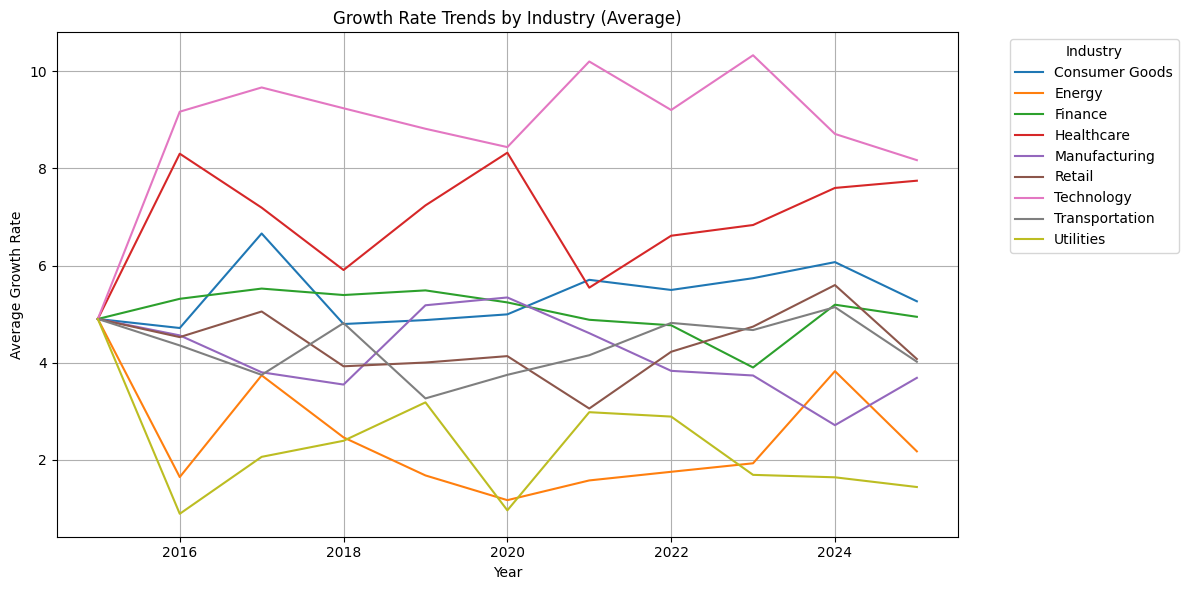

In [60]:
plt.figure(figsize=(12,6))
# Group by Industry and Year, then average GrowthRate
industry_year_avg = df.groupby(['Industry', 'Year'])['GrowthRate'].mean().unstack('Industry')
industry_year_avg.plot(figsize=(12,6))
plt.title('Growth Rate Trends by Industry (Average)')
plt.xlabel('Year')
plt.ylabel('Average Growth Rate')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
df.columns

Index(['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance'],
      dtype='object')

# 4. Correlation heatmap

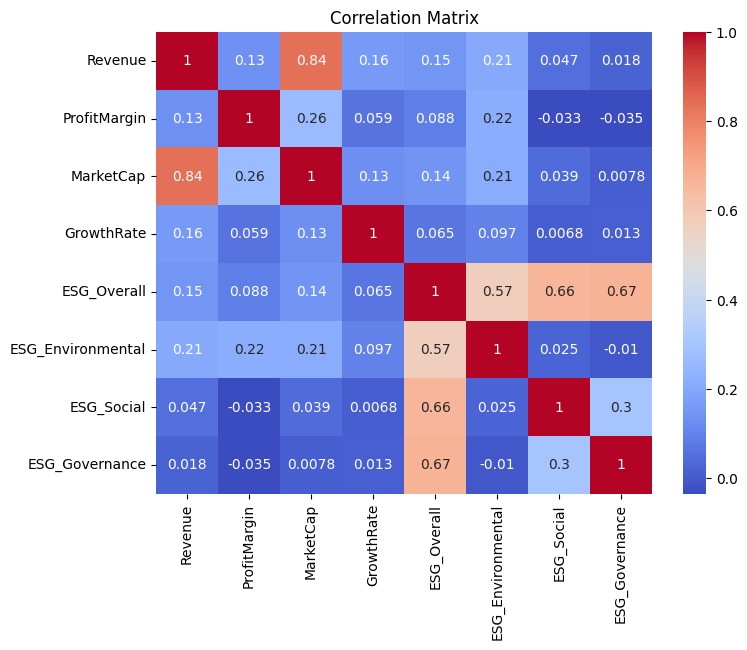

In [38]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Action 3: Running Fixed Effects and Random Effects Models

In [39]:
## Install necessary packages if not already

In [40]:
pip install linearmodels statsmodels

In [41]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare

In [42]:
df.columns

Index(['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance'],
      dtype='object')

In [43]:
# Definin Dependent and Independent Variables
y = df['GrowthRate']
X = df[['Revenue', 'ProfitMargin', 'MarketCap','ESG_Overall']]
X = sm.add_constant(X)

## Fixed Effects model

In [44]:
fe_model = PanelOLS(y, X, entity_effects=True)
fe_results = fe_model.fit()
print("Fixed Effects Model Results:")
print(fe_results.summary)

Fixed Effects Model Results:
                          PanelOLS Estimation Summary                           
Dep. Variable:             GrowthRate   R-squared:                        0.0192
Estimator:                   PanelOLS   R-squared (Between):              0.1835
No. Observations:               11000   R-squared (Within):               0.0192
Date:                Mon, Jul 21 2025   R-squared (Overall):              0.0255
Time:                        16:37:04   Log-likelihood                -3.941e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      53.653
Entities:                           9   P-value                           0.0000
Avg Obs:                       1222.2   Distribution:                 F(4,10987)
Min Obs:                       1045.0                                           
Max Obs:                       1331.0   F-statistic (robust):             53.653

## Random Effects model

In [45]:
re_model = RandomEffects(y, X)
re_results = re_model.fit()
print("\nRandom Effects Model Results:")
print(re_results.summary)


Random Effects Model Results:
                        RandomEffects Estimation Summary                        
Dep. Variable:             GrowthRate   R-squared:                        0.0195
Estimator:              RandomEffects   R-squared (Between):              0.1945
No. Observations:               11000   R-squared (Within):               0.0192
Date:                Mon, Jul 21 2025   R-squared (Overall):              0.0259
Time:                        16:37:04   Log-likelihood                -3.942e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      54.620
Entities:                           9   P-value                           0.0000
Avg Obs:                       1222.2   Distribution:                 F(4,10995)
Min Obs:                       1045.0                                           
Max Obs:                       1331.0   F-statistic (robust):             54.4

## Hausman Test to compare Fixed Effect and Random Effect models

In [46]:
print("\nHausman Test Result:")
comparison = compare({'FE': fe_results, 'RE': re_results})
print(comparison)


Hausman Test Result:
                    Model Comparison                    
                                    FE                RE
--------------------------------------------------------
Dep. Variable               GrowthRate        GrowthRate
Estimator                     PanelOLS     RandomEffects
No. Observations                 11000             11000
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.0192            0.0195
R-Squared (Within)              0.0192            0.0192
R-Squared (Between)             0.1835            0.1945
R-Squared (Overall)             0.0255            0.0259
F-statistic                     53.653            54.620
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
const                           3.9263            3.8590
                              (11.258)          (6.7029)
Revenue                         0.0002            0.0002
         

# Model Diagnostics and Validation

In [47]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

### 1. VIF calculation

In [48]:
print("Variance Inflation Factor (VIF):")
X_df = X.drop('const', axis=1)  # remove constant for VIF calc
vif_data = pd.DataFrame()
vif_data["feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
print(vif_data)

Variance Inflation Factor (VIF):
        feature       VIF
0       Revenue  4.160737
1  ProfitMargin  2.590975
2     MarketCap  3.943176
3   ESG_Overall  2.678081


### 2. Heteroscedasticity test (Breusch-Pagan)

In [52]:
residuals = fe_results.resids
residuals

Industry        Year
Retail          2015     0.686001
                2016    -1.004329
                2017    14.972726
                2018    -5.325648
                2019    -4.918205
                          ...    
Consumer Goods  2021    -5.083995
                2022    -2.744451
                2023    -8.377381
                2024   -12.360686
                2025    -5.901237
Name: residual, Length: 11000, dtype: float64

### 2. Durbin-Watson test for autocorrelation

In [53]:
dw_stat = durbin_watson(residuals)
print(f"\nDurbin-Watson statistic: {dw_stat}")


Durbin-Watson statistic: 1.405952063431071


### 3. Plot residuals histogram and QQ plot

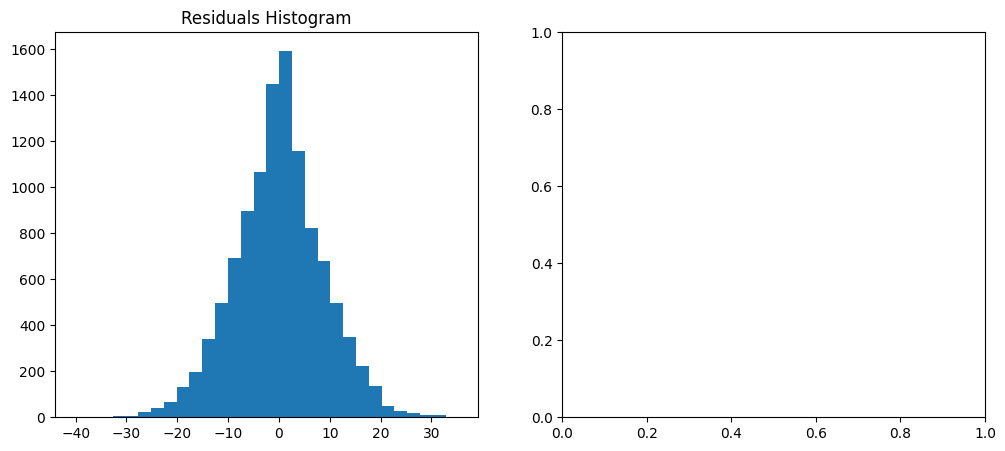

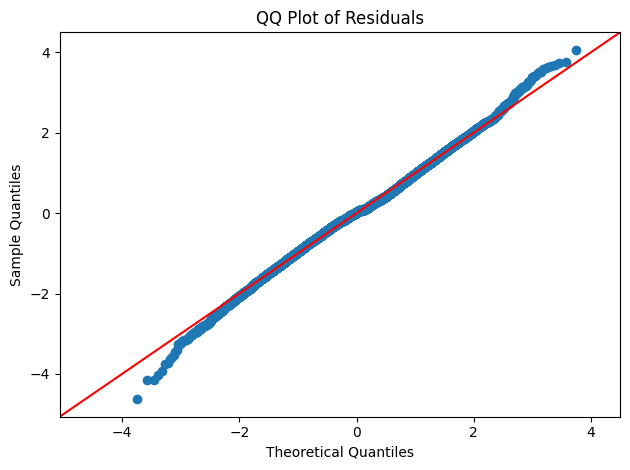

In [54]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(residuals, bins=30)
plt.title('Residuals Histogram')

plt.subplot(1,2,2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()


## Coefficient Plot

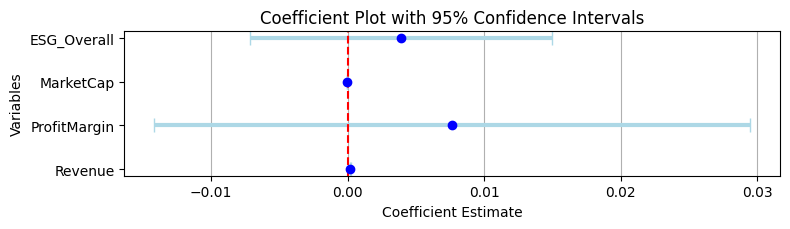

In [55]:
# Extract coefficients, standard errors, and variable names
coef = fe_results.params
se = fe_results.std_errors
variables = coef.index

# Calculate 95% confidence intervals
lower = coef - 1.96 * se
upper = coef + 1.96 * se

# Exclude intercept if you want (optional)
coef = coef.drop('const', errors='ignore')
lower = lower.drop('const', errors='ignore')
upper = upper.drop('const', errors='ignore')
variables = coef.index

# Plotting
plt.figure(figsize=(8, len(coef)*0.6))
plt.errorbar(coef, variables, xerr=1.96*se[variables], fmt='o', color='blue', ecolor='lightblue', elinewidth=3, capsize=5)
plt.axvline(x=0, color='red', linestyle='--')  # Reference line at 0
plt.title('Coefficient Plot with 95% Confidence Intervals')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Variables')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()